# flow chart -- what are we doing>
![road to the future](./picture/Snipaste_2025-03-11_14-45-54.png)

In [220]:
from torch import nn
import torch
import matplotlib.pyplot as plt
weight = 0.3
bias = 0.7

x = torch.arange(start=0, end=1, step=0.02).unsqueeze(dim=1)
y = weight*x + bias
# spilt x, y
train_split = int(0.8*len(x))

x_trian = x[: train_split]
y_trian = y[: train_split]
x_test = x[train_split:]
y_test = y[train_split:]

x



tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [221]:
def plot_predictions(train_data=x_trian,
                     train_labels=y_trian,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=None,
                     title=None):
    plt.figure(figsize=(10, 7), edgecolor="b")
    plt.title(title)
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="r", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="g", s=4, label="Predicitons")

    
    plt.legend(prop={"size": 14})


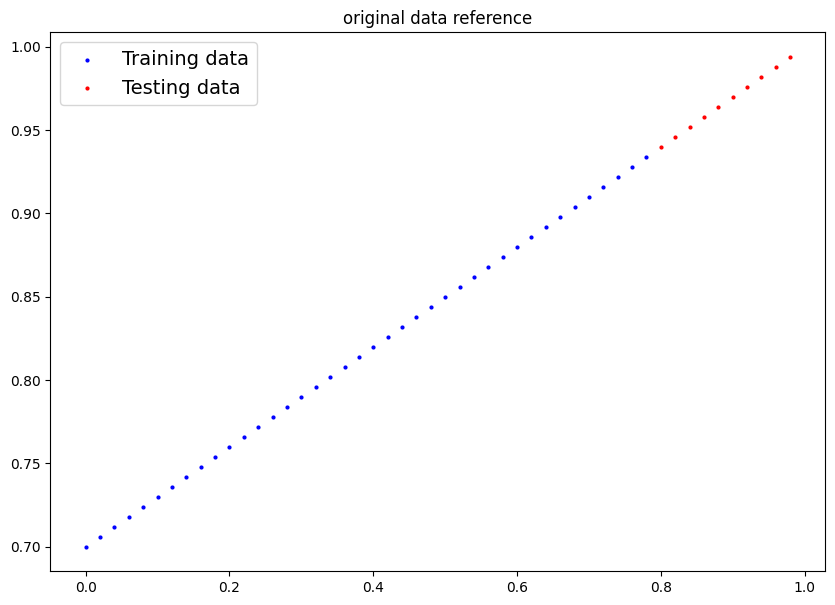

In [222]:
plot_predictions(title="original data reference")

In [223]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(data=torch.rand(1, requires_grad=True,
                                               dtype=torch.float))
        
        self.bias = nn.Parameter(data=torch.rand(1, requires_grad=True,
                                               dtype=torch.float))
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights *x + self.bias


### Checking the contents of our PyTorch model

Now we`ve created a model, let`s see what`s inside...

### break point 
we can check our model parameters or what`s inside our model using .parameters().



In [224]:
# Creat a random seed
torch.manual_seed(15) 
# Why? if we creat the random seed, we can control the parameters, we possbily randomize the value in the bracket

# Creat an instance of the model
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

# list named parameters
model_0.state_dict()


OrderedDict([('weights', tensor([0.2973])), ('bias', tensor([0.2766]))])

In [225]:
# def findNum():
#     count=0
#     while(1):
        
#         torch.manual_seed(count)
#         model_0.weights = torch.rand(1)
#         model_0.bias = torch.rand(1)

#         if model_0.weights < 0.3 and model_0.bias < 0.3:
#             break
#         else:
#             print(f"when num = {count}, not findNum")
#             print(model_0.weights,model_0.bias)
#             count+=1
#     return count
        
# findNum()

## Makeing prediction using torch.inference_mode()
When we pass data through our model.it`s going to run it through the forward() method

In [226]:
model_0.forward(x_test)

tensor([[0.5145],
        [0.5204],
        [0.5264],
        [0.5323],
        [0.5382],
        [0.5442],
        [0.5501],
        [0.5561],
        [0.5620],
        [0.5680]], grad_fn=<AddBackward0>)

## what is the grad_fn?
it record the where variable come from
for instance assign to the x=1, because x is created directly, so x.grad_fn -> None,but when we assign the y=x*3,y.grad_fn -> <AddBackward object at 0x1100477b8>(the address possibly false)
    refer to the https://blog.csdn.net/zphuangtang/article/details/112788037

In [227]:
# Make predictions with model
with torch.inference_mode():
    y_pred = model_0(x_test)    

y_pred, x_trian.squeeze()

(tensor([[0.5145],
         [0.5204],
         [0.5264],
         [0.5323],
         [0.5382],
         [0.5442],
         [0.5501],
         [0.5561],
         [0.5620],
         [0.5680]], grad_fn=<AddBackward0>),
 tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
         0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
         0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
         0.7200, 0.7400, 0.7600, 0.7800]))

## when you use the inference mode, it can make your model run faster(official original word)
## https://x.com/PyTorch/status/1437838231505096708
## Pytorch:While NoGrad excludes operations from being tracked by Autograd, InferenceMode takes that two steps ahead, potentially speeding up your code (YMMV depending on model complexity and hardware)




In [228]:
y_test

tensor([[0.9400],
        [0.9460],
        [0.9520],
        [0.9580],
        [0.9640],
        [0.9700],
        [0.9760],
        [0.9820],
        [0.9880],
        [0.9940]])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_20168\3269647882.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  plot_predictions(predictions=torch.tensor(y_pred).numpy())


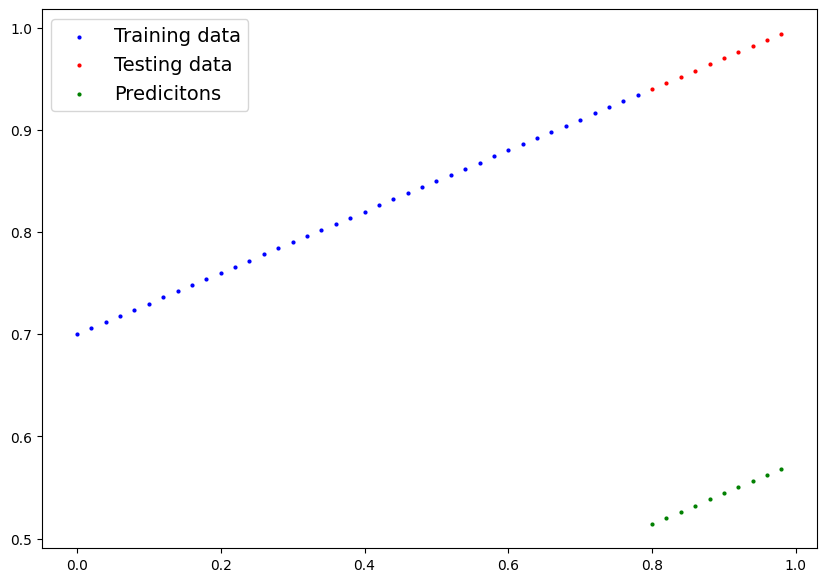

In [229]:
plot_predictions(predictions=torch.tensor(y_pred).numpy())

## Pytorch model building essentials

* torch.nn - contains all of the buildings for computational graphs a(neural networks can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn,offent a Pytorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite for forward()
* torch.optim - this where the optimizers in Pytorch live, they will help with gradient descent(it can optimize out value such as the weight and bias assigning to rather than random num)
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation
    

## Pytorch Cheat Sheet 
### if you forget some functions, i recommend a nice website about pytorch
[Cheat Sheet](https://pytorch.org/tutorials/beginner/ptcheat.html
)

##  train our first machine learning model
The whole idea of traning is for a model to move from some *unkonwn* parameters to some *konwn* parameters

## one way is to use loss funcitons to work out how poor your model are or how wrong

* Note:Loss function may also be called cost function or criterion in different areas.

* **Loss function** a function to measure how wrong your model`s are to the ideal outputs, lower is better.损失函数：衡量模型预测与理想输出偏差程度的函数，越低越好[L1loss](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html#torch.nn.L1Loss)

* **Optimizer** Taking into account the loss of a model and adjusts the model`s parameters(e.g weight & bias) to improve the loss func  https://pytorch.org/docs/stable/optim.html ,we usually use the algorithm of SGD

## And specifically for Pytorch,we need:
* A training loop
* A testing loop

In [230]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.2973], requires_grad=True),
 Parameter containing:
 tensor([0.2766], requires_grad=True)]

In [231]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.2973])), ('bias', tensor([0.2766]))])

In [232]:
# set up the loss function
loss_fn = nn.L1Loss()

# setup an optimizer(stochastic gradient descent)
optimizer = torch.optim.SGD(model_0.parameters(),
                            lr=0.001) # lr = learning rate , the most important hyperparameter(https://en.wikipedia.org/wiki/Machine_learning) you can set

In [233]:
loss_fn, optimizer

(L1Loss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.001
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

# Key point
## MAE(Mean Absolute Error)
measures the absolute difference between two points (predictions and labels) and then takes the mean across all examples
When we invoked the **torch.nn.L1loss**,in fact, we use it(MAE)
* if you want to classify whether a photo is of a dog or a cat, you `ll likely way to use nn.BCELoss()  (#BCE = binary cross entropy loss)

## SGD(Stochastic Gradient Descent)
[Official doc](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html)</br>
Parameters
params (iterable) – iterable of parameters or named_parameters to optimize or iterable of dicts defining parameter groups. When using named_parameters, all parameters in all groups should be named</br>

lr (float, Tensor, optional) – learning rate (default: 1e-3)

## recalling the flow chart, we need building a training loop(and testing loop) in PyTorch
<font size = "5">
0. Loop thorough the data</br>
1.Forward pass(or called forward porpagation)[I think it is a bridge connecting the input layer with output layer]</br>
2.Calculate the loss(compare forward pass predictions to ground truth labels)</br>
3.Optimizer zero grad</br>
4. Loss backward -move backward through the network to calculate the gradients of each of the parameters of our model with respect to the loss</br>
5.Optimizers sep - use the optimizer to adjust our model`s parameters to try and improve loss
</font>

In [234]:
from easily_stopping import EarlyStopping as es
# With the above the way
# An epoch is one loop thorough the data...
torch.manual_seed(42)
epochs = 1000
epoch_count = [ ]
epoch_losses = [ ]
easily_stopper = es()

# 0. Loop thorough the data
for epoch in range(epochs):
    # set the model to training mode
    model_0.train() # train mode in PyTorch sets(verb, 设置) all parameters that require gradients to require gradients
    # 1. Forward pass
    y_pred = model_0(x_trian)

    # 2. calculate the loss
    loss = loss_fn(y_pred, y_trian)
    print(f"loss: {loss}")
    # 3. optimizer zero_grad
    optimizer.zero_grad()
    # 4. Perform backpropagation on th e loss with respect to tge parameters of the model 
    loss.backward()
    # 5.step the optimizer (perform gradient descent)
    optimizer.step()
    easily_stopper(loss)
    ### Testing
    if epoch % 10 ==0:
        # set the model to evaluation mode 
        epoch_count.append(epoch)
        epoch_losses.append(loss)
model_0.eval() # turns off gradient tracking and different behaviors in the training and testing modes  
    

loss: 0.42444610595703125
loss: 0.4232940077781677
loss: 0.4221419394016266
loss: 0.42098984122276306
loss: 0.4198377728462219
loss: 0.4186856746673584
loss: 0.4175335764884949
loss: 0.41638150811195374
loss: 0.4152294099330902
loss: 0.41407737135887146
loss: 0.41292524337768555
loss: 0.4117732048034668
loss: 0.4106210768222809
loss: 0.40946897864341736
loss: 0.4083169102668762
loss: 0.4071648120880127
loss: 0.40601277351379395
loss: 0.4048606753349304
loss: 0.40370863676071167
loss: 0.40255650877952576
loss: 0.40140438079833984
loss: 0.4002523422241211
loss: 0.39910024404525757
loss: 0.39794817566871643
loss: 0.3967960774898529
loss: 0.3956439793109894
loss: 0.39449191093444824
loss: 0.3933398127555847
loss: 0.39218777418136597
loss: 0.39103564620018005
loss: 0.3898835778236389
loss: 0.3887314796447754
loss: 0.38757938146591187
loss: 0.3864273428916931
loss: 0.3852752149105072
loss: 0.38412314653396606
loss: 0.3829710781574249
loss: 0.381818950176239
loss: 0.38066691160202026
loss: 0.

LinearRegressionModel()

In [235]:
import numpy as np
epoch_count, np.array(torch.tensor(epoch_losses).numpy())

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190,
  200,
  210,
  220,
  230,
  240,
  250,
  260,
  270,
  280,
  290,
  300,
  310,
  320,
  330,
  340,
  350,
  360,
  370,
  380,
  390,
  400,
  410,
  420,
  430,
  440,
  450,
  460,
  470,
  480,
  490,
  500,
  510,
  520,
  530,
  540,
  550,
  560,
  570,
  580,
  590,
  600,
  610,
  620,
  630,
  640,
  650,
  660,
  670,
  680,
  690,
  700,
  710,
  720,
  730,
  740,
  750,
  760,
  770,
  780,
  790,
  800,
  810,
  820,
  830,
  840,
  850,
  860,
  870,
  880,
  890,
  900,
  910,
  920,
  930,
  940,
  950,
  960,
  970,
  980,
  990],
 array([0.4244461 , 0.41292524, 0.40140438, 0.38988358, 0.37836272,
        0.36684188, 0.35532102, 0.3438002 , 0.33227935, 0.32075852,
        0.30923766, 0.29771683, 0.28619596, 0.27467513, 0.26315427,
        0.25163347, 0.24011259, 0.22859173, 0.21707089, 0.20555004,
        0.19402923, 0.18250836, 0.1709

In [236]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3282])), ('bias', tensor([0.6881]))])

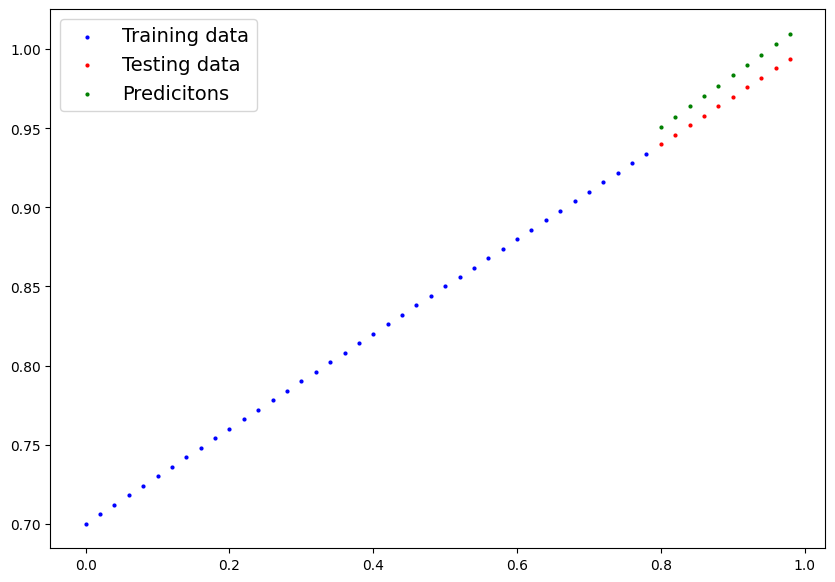

In [237]:
with torch.inference_mode():
    y_pred = model_0(x_test)
    plot_predictions(predictions=y_pred)

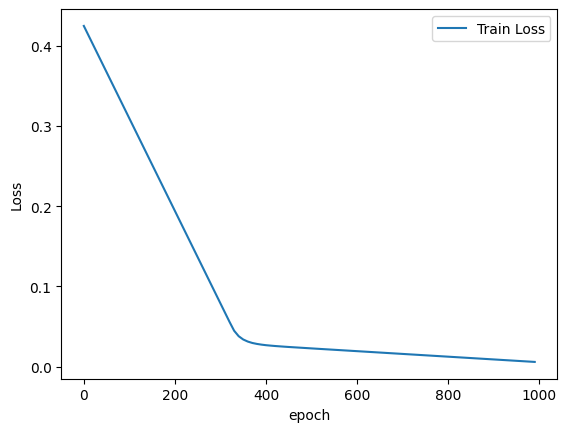

In [238]:
plt.plot(epoch_count, np.array(torch.tensor(epoch_losses).numpy()), label='Train Loss')
# plt.plot(epoch_count, epoch_val_losses, label='Test Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()

In [239]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3282])), ('bias', tensor([0.6881]))])

# Saving the data and model
## Scene:if you close the kernel,you will lose the variable and function, so you need to run the code again, but where do my training data and model go?,it is gone.so we need to save the model and data.
https://pytorch.org/tutorials/beginner/saving_loading_models.html

## there are three ways to solve this problem
1. torch.save() -allows you save a PyTorch object in Pyton`s pickle format`
2. torch.load()
3. torch.nn.Module.load_state_dict()


In [240]:
model_0.state_dict()


OrderedDict([('weights', tensor([0.3282])), ('bias', tensor([0.6881]))])

In [241]:
# saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models") # it is the path name，it will be the name of your dictionary name
#*parent:父级,when it is true, it will create all the parents of the path.
MODEL_PATH.mkdir(parents=True, exist_ok=True)
# exist_ok: if the path exists, it will not create a new one.

# 2. Creat model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"

MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
# the / operator is overloaded to perform path joining. not division!!!
print(f"Saving model to :{MODEL_SAVE_PATH}")
# it is my idea. the opration make the "models"(it is your definition) correspond to the path
# in brief, making the name correspond to the path.

# 3. save the model state dict
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)


Saving model to :models\01_pytorch_workflow_model_0.pth


# Loading a PyTorch model
Since we saved our model```s state_dict rather than the entire model, we need to create a new instance of our model and load the saved state_dict into it.,we ```ll create a new instace of our model class and load state_dict() into that.`

In [242]:
## instantiate a new instance
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH, weights_only=False))
## error:Error: Expected state_dict to be dict-like, got <class '__main__.LinearModel'>
## if you meet it,please use torch.save(model.state_dict(), './linear_model_state_dict.pth') rather than torch.save(model, './linear_model.pth')    
# Why? becasue torch.save(model, './linear_model.pth') will save the whole model, not just the state_dict.
# https://blog.csdn.net/qq_41076797/article/details/111085687 is will porobaly meet the same problem  

<All keys matched successfully>

In [243]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.3282])), ('bias', tensor([0.6881]))])

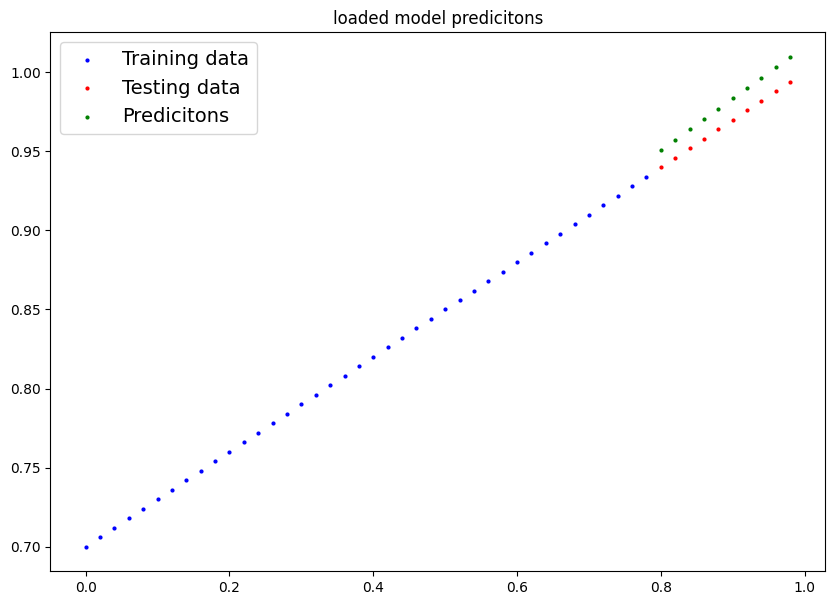

In [244]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_0_preds = loaded_model_0(x_test)

loaded_model_0_preds[::]
plot_predictions(predictions=loaded_model_0_preds, title="loaded model predicitons")

In [247]:
# compare with original y_pred
# print(y_pred, loaded_model_0_preds)
y_preds = model_0(x_test)
y_preds == loaded_model_0_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Dropout
https://dl.acm.org/doi/epdf/10.5555/2627435.2670313